**DICIONARIO DE DADOS**
- **id**: ID de assinante exclusivo.
- **is_tv_subscriber**: se o cliente tem assinatura de TV.
- **is_movie_package_subscriber**: se o cliente tem um pacote de filmes de cinema.
- **subscription_age**: há quantos anos o cliente usa o serviço.
- **bill_avg**: média da fatura dos últimos 3 meses.
- **reamining_contract**: quantos anos restantes para o contrato do cliente. Se **nulo**, o cliente não tem contrato.
- **service_failure_count**: contagem de chamadas de clientes para call center por falha de serviço nos últimos 3 meses.
- **download_avg**: últimos 3 meses de uso de internet (GB).
- **upload_avg**: média de upload dos últimos três meses (GB).
- **download_over_limit**: a maioria dos clientes tem um limite de download. se atingirem esse limite, terão que pagar por isso. Esta coluna contém quantidade acima do limite.
- **churn**: se o cliente deu churn ou não

## SETTINGS

### Download Libraries

In [126]:
!pip install optuna
!pip install xgboost
!pip install lightgbm

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
  Using cached xgboost-1.7.6-py3-none-win_amd64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.0.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.0.0-py3-none-win_amd64.whl (1.3 MB)


### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 100

### Upload Data Base

In [3]:
df = pd.read_csv('../data/atividade-2-churn-internet.csv')
display(df.info())
display(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


None

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1


**DICIONARIO DE DADOS**
- **id**: ID de assinante exclusivo.
- **is_tv_subscriber**: se o cliente tem assinatura de TV.
- **is_movie_package_subscriber**: se o cliente tem um pacote de filmes de cinema.
- **subscription_age**: há quantos anos o cliente usa o serviço.
- **bill_avg**: média da fatura dos últimos 3 meses.
- **reamining_contract**: quantos anos restantes para o contrato do cliente. Se **nulo**, o cliente não tem contrato.
- **service_failure_count**: contagem de chamadas de clientes para call center por falha de serviço nos últimos 3 meses.
- **download_avg**: últimos 3 meses de uso de internet (GB).
- **upload_avg**: média de upload dos últimos três meses (GB).
- **download_over_limit**: a maioria dos clientes tem um limite de download. se atingirem esse limite, terão que pagar por isso. Esta coluna contém quantidade acima do limite.
- **churn**: se o cliente deu churn ou não

## ANALYSIS

### Descriptive Analysis

#### General

In [4]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [6]:
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [7]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

Vamos avaliar a distribuição das variáveis numéricas

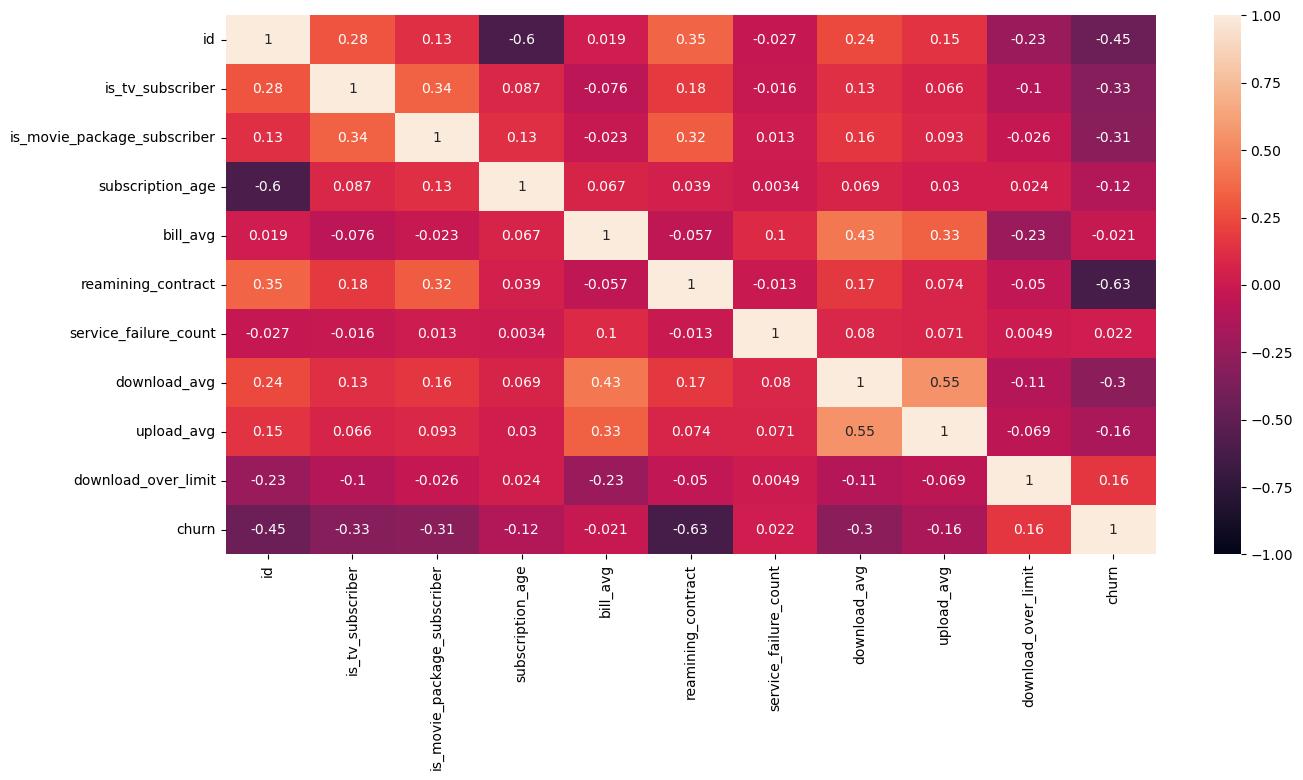

In [8]:
# Mapa de Calor para Correlação
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

- Avaliando inicialmente a base bruta, com a matriz de correlação, identificamos correlações entre a variável alvo churn e outras features. Iremos comprovar essa hipótese mais adiante. 
- Não vamos avaliar a feature **id**, pois a mesma é somente para identificação do usuário.

#### is_tv_subscriber

In [9]:
df.is_tv_subscriber.value_counts()

1    58922
0    13352
Name: is_tv_subscriber, dtype: int64

In [10]:
df[['churn', 'is_tv_subscriber']].corr()

,churn,is_tv_subscriber
churn,1.000000,-0.327582
is_tv_subscriber,-0.327582,1.000000


#### subscription_age

In [11]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

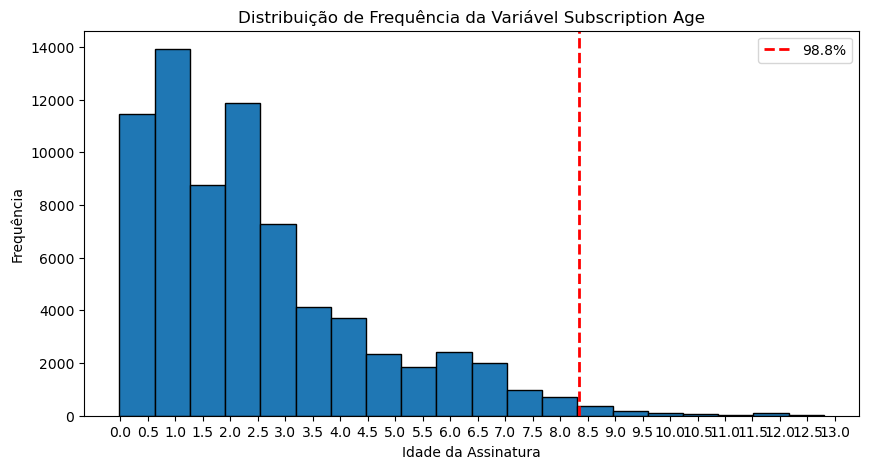

In [12]:
# Distribuição de subscription_age
subscription_age = df['subscription_age']

plt.figure(figsize=(10, 5))  # Ajuste os valores (largura, altura) conforme necessário
plt.hist(subscription_age, bins=20, edgecolor='k') 
plt.title('Distribuição de Frequência da Variável Subscription Age')
plt.xlabel('Idade da Assinatura')
plt.ylabel('Frequência')

# Linha 98.8%
percentile_98_8 = np.percentile(subscription_age, 98.8)
plt.axvline(percentile_98_8, color='red', linestyle='dashed', linewidth=2, label='98.8%')
plt.legend()
plt.xticks(np.arange(0, max(subscription_age) + 0.5, 0.5))
plt.grid(False)
plt.show()



In [13]:
subscription_age_zero_abs = len(df[df['subscription_age'] == 0])
total_rows = len(df)
subscription_age_zero_percent = (subscription_age_zero_abs / total_rows) * 100

print(f'Valor absoluto de subscription_age igual a 0: {subscription_age_zero_abs}')
print(f'Percentual de subscription_age igual a 0 em relação ao todo: {subscription_age_zero_percent:.2f}%')

Valor absoluto de subscription_age igual a 0: 278
Percentual de subscription_age igual a 0 em relação ao todo: 0.38%


In [14]:
# Calcule os quartis
quartis = df['subscription_age'].quantile([0.25, 0.5, 0.75])

# Imprima os quartis
print("Primeiro Quartil (Q1):", quartis[0.25])
print("Mediana (Q2):", quartis[0.5])
print("Terceiro Quartil (Q3):", quartis[0.75])

Primeiro Quartil (Q1): 0.93
Mediana (Q2): 1.98
Terceiro Quartil (Q3): 3.3


In [15]:
churn_total = len(df[df['churn'] == 1])
churn_q4 = len(df[(df['churn'] == 1) & (df['subscription_age'] >= 3.3)])
percentual = (churn_q4 * 100 / churn_total)

print(f'Percentual de registros com remaining_contract >= 3.3 e churn: {percentual:.2f}%')

Percentual de registros com remaining_contract >= 3.3 e churn: 20.31%


In [16]:
tv_sub_total = len(df[df['is_tv_subscriber'] == 1])
tv_sub = len(df[(df['is_tv_subscriber'] == 1) & (df['subscription_age'] >= 3.3)])
percentual_tv_sub = (tv_sub * 100 / tv_sub_total)

print(f'Percentual de registros com remaining_contract >= 3.3 e tv_subscriber n: {percentual_tv_sub:.2f}%')

Percentual de registros com remaining_contract >= 3.3 e tv_subscriber n: 26.56%


Cerca de **98,5%** das assinaturas possuem até aproximadamente 8 anos.  

#### bill_avg

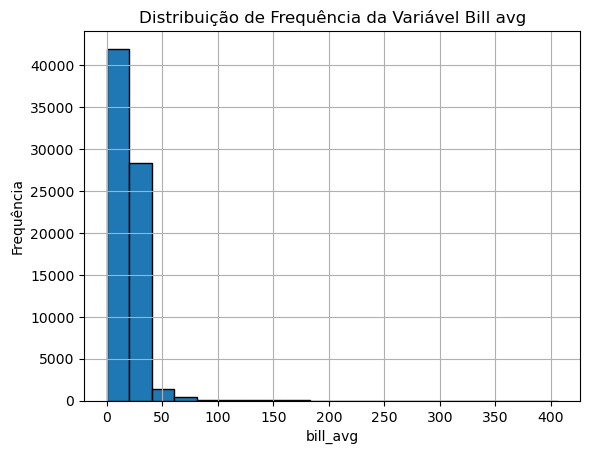

In [17]:
# Distribuição de bill_avg

bill_avg = df['bill_avg']
plt.hist(bill_avg, bins=20, edgecolor='k') 
plt.title('Distribuição de Frequência da Variável Bill avg')
plt.xlabel('bill_avg')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### reamining_contract

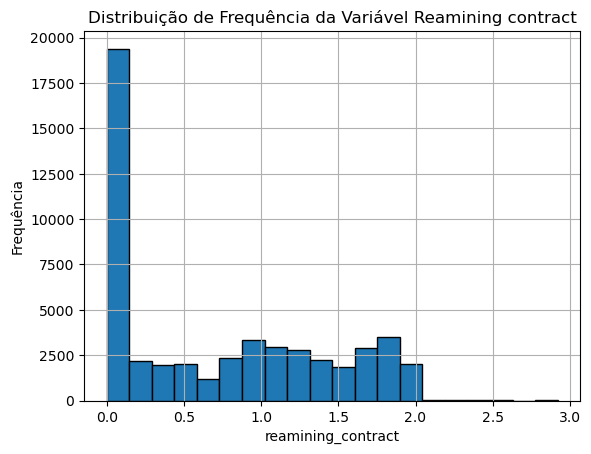

In [18]:
reamining_contract = df['reamining_contract']
plt.hist(reamining_contract, bins=20, edgecolor='k')  
plt.title('Distribuição de Frequência da Variável Reamining contract')
plt.xlabel('reamining_contract')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [19]:
df.reamining_contract.value_counts()

0.00    16363
0.01      470
1.84      348
1.95      340
1.82      338
        ...  
2.63        1
2.23        1
2.31        1
2.20        1
2.67        1
Name: reamining_contract, Length: 247, dtype: int64

In [20]:
print("Quantidade de valores nulos em remaining_contract:", df['reamining_contract'].isnull().sum())
print("Quantidade de valores iguais a 0 em remaining_contract:", (df['reamining_contract'] == 0).sum())

Quantidade de valores nulos em remaining_contract: 21572
Quantidade de valores iguais a 0 em remaining_contract: 16363


In [21]:
# Conte a quantidade de casos em que is_tv_subscriber é igual a 1 e remaining_contract é nulo
display(df[(df['is_tv_subscriber'] == 1) & df['reamining_contract'].isnull()])
print("Quantidade de casos onde is_tv_subscriber é igual a 1 e remaining_contract é nulo:", ((df['is_tv_subscriber'] == 1) & df['reamining_contract'].isnull()).sum())

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
21,549,1,0,11.93,24,NaN,0,9.3,0.7,0,0
40,921,1,0,6.35,21,NaN,0,0.0,0.0,0,1
42,933,1,0,5.30,79,NaN,2,0.0,0.0,0,1
46,1006,1,0,10.26,17,NaN,0,0.0,0.0,0,1
49,1051,1,1,8.13,22,NaN,0,10.2,7.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72168,1687632,1,0,0.22,8,NaN,3,41.8,0.9,0,1
72198,1688271,1,0,0.36,19,NaN,0,117.9,9.0,0,1
72199,1688290,1,1,0.32,20,NaN,0,55.4,5.9,0,1
72249,1689246,1,0,0.10,16,NaN,0,11.4,0.9,0,1


Quantidade de casos onde is_tv_subscriber é igual a 1 e remaining_contract é nulo: 13610


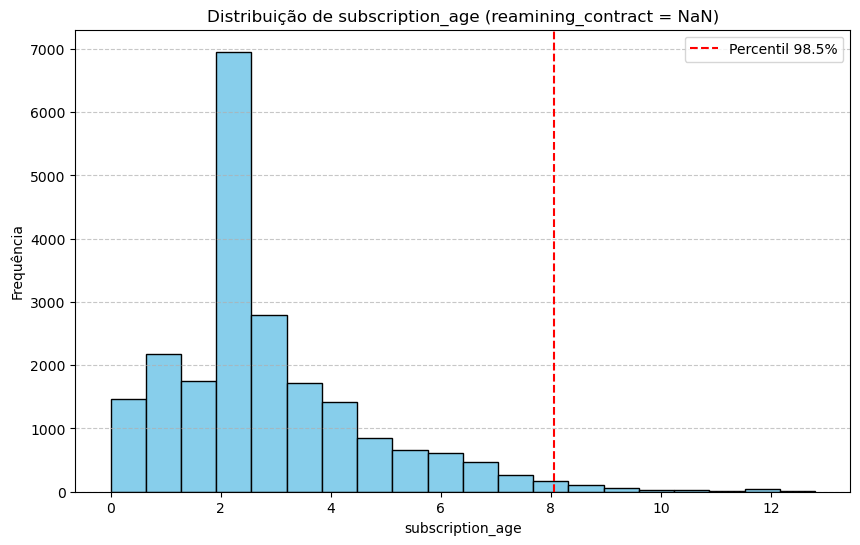

In [22]:
filtered_df = df[(df.reamining_contract.isnull())]
percentile_98_5 = np.percentile(filtered_df['subscription_age'], 98.5)
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['subscription_age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=percentile_98_5, color='red', linestyle='--', label='Percentil 98.5%')
plt.xlabel('subscription_age')
plt.ylabel('Frequência')
plt.title('Distribuição de subscription_age (reamining_contract = NaN)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Temos 13610 clientes que assinaram a TV e não possuíam contrato, no caso a coluna **reamining_contract** com valor nulo. Com isso podemos concluir que mesmo sem contrato muitos clientes possuem pacotes de tv e filmes. Muitos com mais de 12 meses de inscrição. 

#### service_failure_count

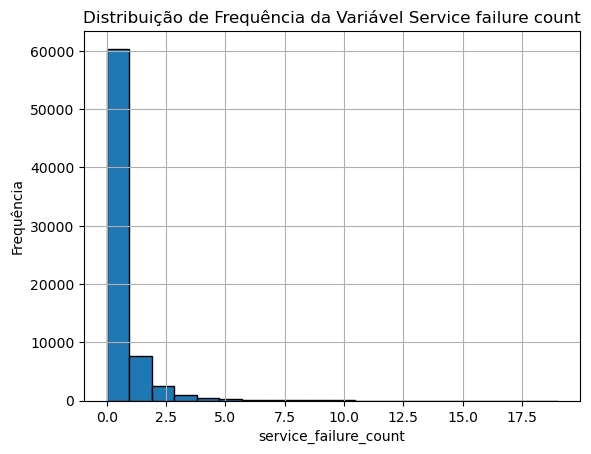

In [23]:
# Distribuição de service_failure_count

service_failure_count = df['service_failure_count']
plt.hist(service_failure_count, bins=20, edgecolor='k')  
plt.title('Distribuição de Frequência da Variável Service failure count')
plt.xlabel('service_failure_count')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### download_avg

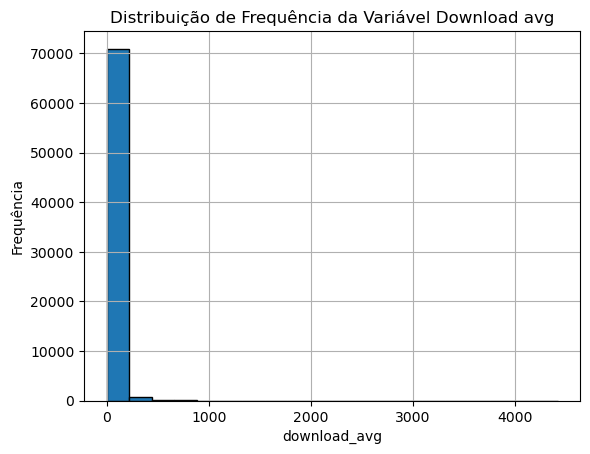

In [24]:
# Distribuição de download_avg

download_avg = df['download_avg']
plt.hist(download_avg, bins=20, edgecolor='k')  
plt.title('Distribuição de Frequência da Variável Download avg')
plt.xlabel('download_avg')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### upload_avg

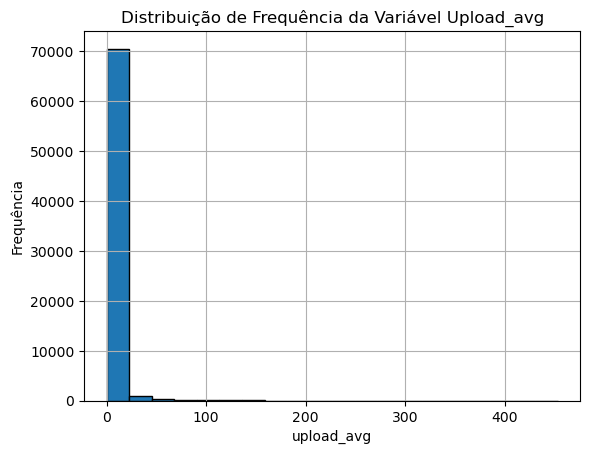

In [25]:
# Distribuição de upload_avg

upload_avg = df['upload_avg']
plt.hist(upload_avg, bins=20, edgecolor='k')  
plt.title('Distribuição de Frequência da Variável Upload_avg')
plt.xlabel('upload_avg')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### download_over_limit

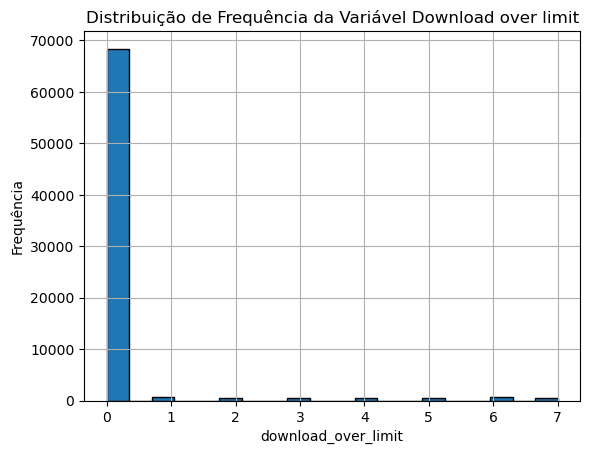

In [26]:
# Distribuição de download_over_limit

download_over_limit = df['download_over_limit']
plt.hist(download_over_limit, bins=20, edgecolor='k')  
plt.title('Distribuição de Frequência da Variável Download over limit')
plt.xlabel('download_over_limit')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### churn

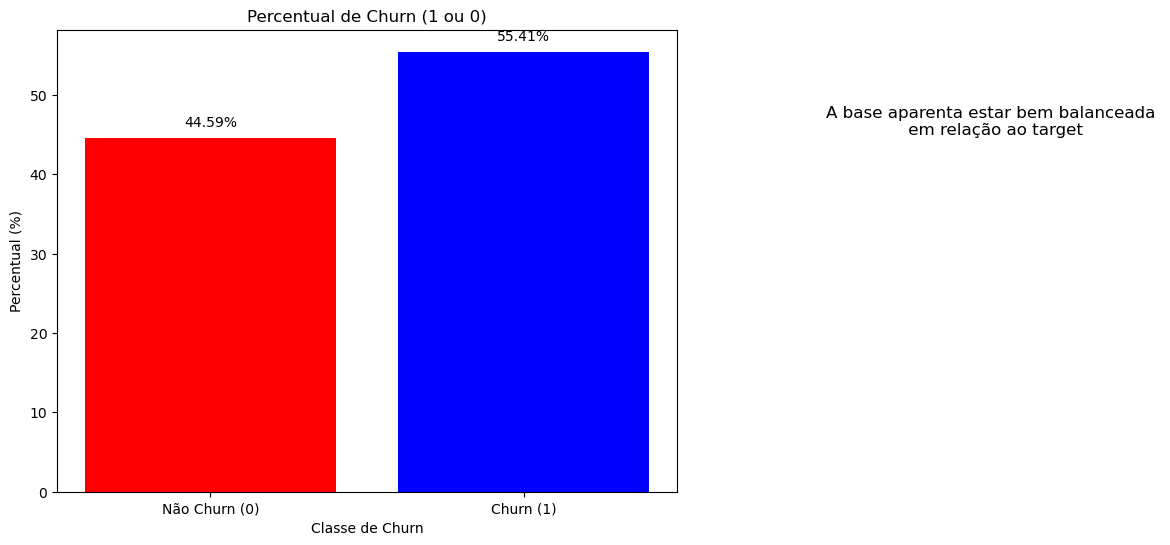

In [27]:
churn_counts = df['churn'].value_counts()
percentual_churn = churn_counts / churn_counts.sum() * 100
plt.figure(figsize=(8, 6))
bars = plt.bar(percentual_churn.index, percentual_churn.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Não Churn (0)', 'Churn (1)'])
plt.xlabel('Classe de Churn')
plt.ylabel('Percentual (%)')
plt.title('Percentual de Churn (1 ou 0)')

for bar, percent in zip(bars, percentual_churn.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percent:.2f}%', ha='center', va='bottom')

plt.text(2.5, 45, 'A base aparenta estar bem balanceada \n em relação ao target', fontsize=12, ha='center')
plt.show()

## DATA PREPROCESSING

### Data Split

In [34]:
df.head(2)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1


In [81]:
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

Como os valores faltantes de **download_avg** e **upload_avg**, são abaixo de 5%, vamos excluí-los do dataframe

In [82]:
df.dropna(subset=['download_avg', 'upload_avg'], inplace=True)

In [83]:
X = df.drop('churn', axis=1)
y = df['churn']

In [84]:
X.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0


In [85]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: churn, dtype: int64

In [86]:
#Como não temos desbalanceamento na nossa variável alvo, não precisaremos fazer uso do argumento stratify da função train_test_split() disponível na biblioteca Scikit-learn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                                                    
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (50325, 10)
X_test: (21568, 10)


In [87]:
print('X_train: {:.1f}'.format(len(X_train)/len(df)))
print('y_train: {:.1f}'.format(len(y_train)/len(df)))
print('X_test: {:.1f}'.format(len(X_test)/len(df)))
print('y_test: {:.1f}'.format(len(y_test)/len(df)))

X_train: 0.7
y_train: 0.7
X_test: 0.3
y_test: 0.3


### Data Preparation

In [88]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [89]:
X_train.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.297089
service_failure_count          0.000000
download_avg                   0.000000
upload_avg                     0.000000
download_over_limit            0.000000
dtype: float64

In [90]:
X_test.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.304479
service_failure_count          0.000000
download_avg                   0.000000
upload_avg                     0.000000
download_over_limit            0.000000
dtype: float64

Os valore nulos de **download_avg** e **upload_avg** serão excluídos, já os valores faltantes de **reamining_contract** necessitarão de um tratamento melhor, vamos criar uma nova coluna cahamada **reamining_contract_cat**, nela teremos os valores distribuídos em 4 categorias (os quantis) e os que não possuem contrato, serão classificados e uma nova categoria  **no_contract**.                

In [91]:
def process_remaining_contract(data):
    data['reamining_contract_cat'] = pd.cut(data['reamining_contract'], 
                                           bins=[-float('inf'), data['reamining_contract'].quantile(0.25),
                                                 data['reamining_contract'].quantile(0.5),
                                                 data['reamining_contract'].quantile(0.75), float('inf')],
                                           labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)
    
    data['reamining_contract_cat'] = data['reamining_contract_cat'].cat.add_categories('no_contract')
    data['reamining_contract_cat'].fillna('no_contract', inplace=True)
    data.drop('reamining_contract', axis=1, inplace=True)
    
    return data

In [92]:
def process_remaining_contract(data):
    data['reamining_contract_cat'] = pd.cut(data['reamining_contract'], 
                                           bins=[-float('inf'), data['reamining_contract'].quantile(0.25),
                                                 data['reamining_contract'].quantile(0.5),
                                                 data['reamining_contract'].quantile(0.75), float('inf')],
                                           labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)
    data['reamining_contract_cat'] = data['reamining_contract_cat'].cat.add_categories('no_contract')
    data['reamining_contract_cat'].fillna('no_contract', inplace=True)
    data.drop('reamining_contract', axis=1, inplace=True)
    return data

In [93]:
X_train = process_remaining_contract(X_train)
X_train.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,reamining_contract_cat
3088,70901,1,0,5.84,10,1,0.0,0.0,0,no_contract
46248,1083752,1,1,2.59,15,0,209.7,15.9,0,Q4
61539,1443043,1,0,0.93,13,0,22.2,1.2,0,Q3
21901,512642,1,0,0.10,9,0,0.0,0.0,0,Q2
45193,1058938,1,0,1.97,21,2,57.6,6.3,0,Q1


In [94]:
X_test = process_remaining_contract(X_test)
X_test.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,reamining_contract_cat
50375,1181234,1,1,2.08,18,0,106.3,14.2,0,Q4
32250,757140,0,0,4.38,19,0,23.8,7.6,0,Q4
35894,842431,0,0,0.21,14,0,5.0,0.3,0,no_contract
61853,1450085,1,0,0.25,12,0,31.0,4.9,0,Q1
35774,840041,1,1,4.11,18,2,120.9,5.4,0,Q4


In [95]:
X_train.isnull().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
reamining_contract_cat         0.0
dtype: float64

In [96]:
X_test.isnull().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
reamining_contract_cat         0.0
dtype: float64

In [97]:
numeric_cols = ['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [103]:
categorical_cols = ['is_tv_subscriber', 'reamining_contract_cat','is_movie_package_subscriber', 'download_over_limit']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

## MODELING

### Logistic Regression

In [105]:
pipeline_lg = Pipeline(steps=[('preprocessor', preprocessor),
                              ('lg', LogisticRegression())])

In [114]:
def objective(trial):
    params = {
        'lg__C': trial.suggest_float('lg__C', 1e-3, 1e1),
        'lg__penalty': trial.suggest_categorical('lg__penalty', ['none', 'l2'])
    }
    pipeline_lg.set_params(**params)
    cv_scores = cross_val_score(pipeline_lg, X_train, y_train, cv=5)
    return cv_scores.mean() 

[I 2023-09-03 22:53:03,302] A new study created in memory with name: no-name-6a2eeb78-5b83-4726-8970-6ebe8fbd6133
[I 2023-09-03 22:53:04,849] Trial 0 finished with value: 0.9225633383010432 and parameters: {'lg__C': 3.040317027353943, 'lg__penalty': 'l2'}. Best is trial 0 with value: 0.9225633383010432.
[I 2023-09-03 22:53:06,584] Trial 1 finished with value: 0.9224838549428714 and parameters: {'lg__C': 0.3149394347798323, 'lg__penalty': 'l2'}. Best is trial 1 with value: 0.9224838549428714.
[I 2023-09-03 22:53:08,568] Trial 2 finished with value: 0.9225633383010432 and parameters: {'lg__C': 5.469761362336252, 'lg__penalty': 'l2'}. Best is trial 1 with value: 0.9224838549428714.
[I 2023-09-03 22:53:10,555] Trial 3 finished with value: 0.9225633383010432 and parameters: {'lg__C': 4.450871322931183, 'lg__penalty': 'l2'}. Best is trial 1 with value: 0.9224838549428714.
[I 2023-09-03 22:53:12,356] Trial 4 finished with value: 0.9225235966219574 and parameters: {'lg__C': 5.99950813834312, '

Acurácia do modelo: 0.92
ROC-AUC do modelo: 0.96
Matriz de Confusão:
[[ 8872   547]
 [ 1113 11036]]


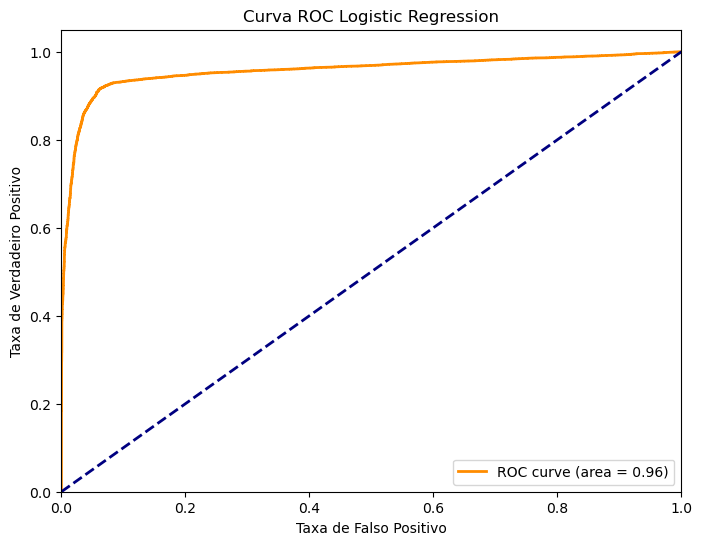

In [121]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50) 
best_params = study.best_params

pipeline_lg.set_params(**best_params)
pipeline_lg.fit(X_train, y_train)

y_pred_lg = pipeline_lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

y_prob_lg = pipeline_lg.predict_proba(X_test)[:, 1]
roc_auc_lg = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC do modelo: {roc_auc_lg:.2f}')

conf_matrix_lg = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix_lg)


fpr_lg, tpr_lg, _ = roc_curve(y_test, y_prob)
roc_auc_lg = auc(fpr_lg, tpr_lg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestClassifier())])

In [123]:
def objective_rf(trial):
    params = {
        'rf__n_estimators': trial.suggest_int('rf__n_estimators', 50, 200),
        'rf__max_depth': trial.suggest_int('rf__max_depth', 5, 30),
        'rf__min_samples_split': trial.suggest_float('rf__min_samples_split', 0.1, 1.0),
        'rf__min_samples_leaf': trial.suggest_float('rf__min_samples_leaf', 0.1, 0.5),
    }
    pipeline_rf.set_params(**params)
    cv_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5)
    return cv_scores.mean() 

[I 2023-09-03 22:54:26,960] A new study created in memory with name: no-name-91fee7b3-235b-43e4-88cc-8fa1d67ff3af
[I 2023-09-03 22:54:31,188] Trial 0 finished with value: 0.7743467461500249 and parameters: {'rf__n_estimators': 96, 'rf__max_depth': 19, 'rf__min_samples_split': 0.36552243435622145, 'rf__min_samples_leaf': 0.17764877529831735}. Best is trial 0 with value: 0.7743467461500249.
[I 2023-09-03 22:54:33,877] Trial 1 finished with value: 0.5544162940884252 and parameters: {'rf__n_estimators': 112, 'rf__max_depth': 8, 'rf__min_samples_split': 0.8829663509417239, 'rf__min_samples_leaf': 0.10159760533132488}. Best is trial 0 with value: 0.7743467461500249.
[I 2023-09-03 22:54:37,260] Trial 2 finished with value: 0.6966517635370095 and parameters: {'rf__n_estimators': 100, 'rf__max_depth': 26, 'rf__min_samples_split': 0.3558966329760833, 'rf__min_samples_leaf': 0.23261411151249642}. Best is trial 0 with value: 0.7743467461500249.
[I 2023-09-03 22:54:38,693] Trial 3 finished with val

Acurácia do modelo Random Forest: 0.91
ROC-AUC do modelo Random Forest: 0.94
Matriz de Confusão Random Forest:
[[ 8260  1159]
 [  786 11363]]


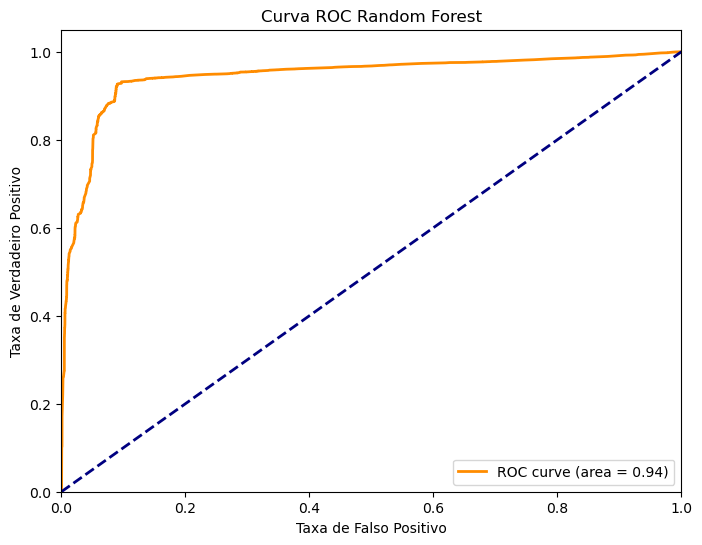

In [124]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50) 
best_params_rf = study_rf.best_params

pipeline_rf.set_params(**best_params_rf)
pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia do modelo Random Forest: {accuracy_rf:.2f}')

y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f'ROC-AUC do modelo Random Forest: {roc_auc_rf:.2f}')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusão Random Forest:')
print(conf_matrix_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC Random Forest')
plt.legend(loc='lower right')
plt.show()

### XGBoost

In [127]:
import xgboost as xgb

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('xgb', xgb.XGBClassifier())])

In [128]:
def objective_xgb(trial):
    params = {
        'xgb__n_estimators': trial.suggest_int('xgb__n_estimators', 50, 200),
        'xgb__max_depth': trial.suggest_int('xgb__max_depth', 3, 10),
        'xgb__learning_rate': trial.suggest_float('xgb__learning_rate', 0.01, 0.3),
        'xgb__subsample': trial.suggest_float('xgb__subsample', 0.6, 1.0),
        'xgb__colsample_bytree': trial.suggest_float('xgb__colsample_bytree', 0.6, 1.0),
    }
    pipeline_xgb.set_params(**params)
    cv_scores = cross_val_score(pipeline_xgb, X_train, y_train, cv=5)
    return cv_scores.mean()

[I 2023-09-03 23:05:07,970] A new study created in memory with name: no-name-9144b799-cc69-4e41-b7db-08ac7db36629
[I 2023-09-03 23:05:14,001] Trial 0 finished with value: 0.9410233482364629 and parameters: {'xgb__n_estimators': 79, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.13200149869381783, 'xgb__subsample': 0.9863284385424334, 'xgb__colsample_bytree': 0.9083567884659886}. Best is trial 0 with value: 0.9410233482364629.
[I 2023-09-03 23:05:19,745] Trial 1 finished with value: 0.9412220566318927 and parameters: {'xgb__n_estimators': 59, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.17464531842971096, 'xgb__subsample': 0.8016015458280816, 'xgb__colsample_bytree': 0.7477639189560688}. Best is trial 1 with value: 0.9412220566318927.
[I 2023-09-03 23:05:33,368] Trial 2 finished with value: 0.9408246398410333 and parameters: {'xgb__n_estimators': 123, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.07902550675645699, 'xgb__subsample': 0.639054156470249, 'xgb__colsample_bytree': 0.78297388237

Acurácia do modelo XGBoost: 0.94
ROC-AUC do modelo XGBoost: 0.98
Matriz de Confusão XGBoost:
[[ 8940   479]
 [  769 11380]]


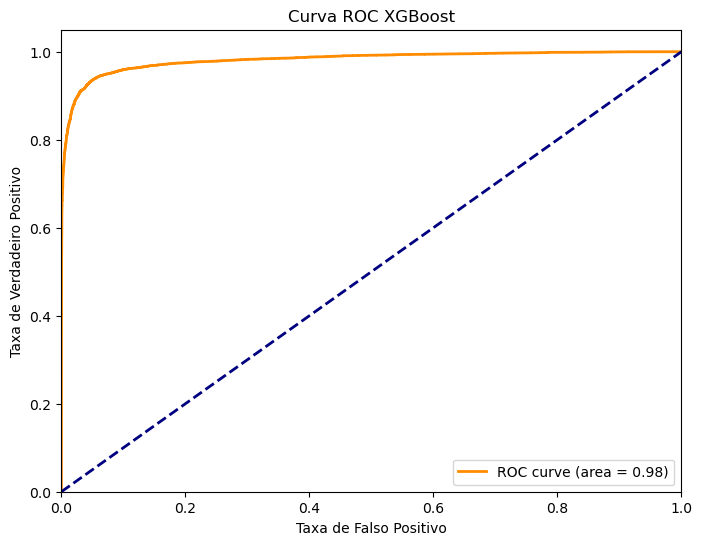

In [129]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50) 
best_params_xgb = study_xgb.best_params

pipeline_xgb.set_params(**best_params_xgb)
pipeline_xgb.fit(X_train, y_train)

y_pred_xgb = pipeline_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.2f}')

y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f'ROC-AUC do modelo XGBoost: {roc_auc_xgb:.2f}')

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('Matriz de Confusão XGBoost:')
print(conf_matrix_xgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC XGBoost')
plt.legend(loc='lower right')
plt.show()

### LightGBM

In [130]:
import lightgbm as lgb

pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('lgbm', lgb.LGBMClassifier())]) 

In [131]:
def objective_lgbm(trial):
    params = {
        'lgbm__n_estimators': trial.suggest_int('lgbm__n_estimators', 50, 200),
        'lgbm__max_depth': trial.suggest_int('lgbm__max_depth', 3, 10),
        'lgbm__learning_rate': trial.suggest_float('lgbm__learning_rate', 0.01, 0.3),
        'lgbm__subsample': trial.suggest_float('lgbm__subsample', 0.6, 1.0),
        'lgbm__colsample_bytree': trial.suggest_float('lgbm__colsample_bytree', 0.6, 1.0),
    }
    pipeline_lgbm.set_params(**params)
    cv_scores = cross_val_score(pipeline_lgbm, X_train, y_train, cv=5)
    return cv_scores.mean()

[I 2023-09-03 23:19:17,979] A new study created in memory with name: no-name-cf43d7c7-303c-4be4-9879-2afe9874489d


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:19:20,708] Trial 0 finished with value: 0.940387481371088 and parameters: {'lgbm__n_estimators': 161, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.2876707643617525, 'lgbm__subsample': 0.8522982351979693, 'lgbm__colsample_bytree': 0.7967020192549477}. Best is trial 0 with value: 0.940387481371088.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-03 23:19:22,410] Trial 1 finished with value: 0.9399105812220565 and parameters: {'lgbm__n_estimators': 155, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.18145236045362567, 'lgbm__subsample': 0.6989080930553526, 'lgbm__colsample_bytree': 0.637616450202322}. Best is trial 0 with value: 0.940387481371088.


[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2023-09-03 23:19:24,097] Trial 2 finished with value: 0.9367511177347243 and parameters: {'lgbm__n_estimators': 170, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.040009805159016816, 'lgbm__subsample': 0.9776902169934006, 'lgbm__colsample_bytree': 0.7905326906625025}. Best is trial 0 with value: 0.940387481371088.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:19:26,175] Trial 3 finished with value: 0.9412617983109787 and parameters: {'lgbm__n_estimators': 146, 'lgbm__max_depth': 6, 'lgbm__learning_rate': 0.1779818242670008, 'lgbm__subsample': 0.8721344790310366, 'lgbm__colsample_bytree': 0.9205914095126315}. Best is trial 3 with value: 0.9412617983109787.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:19:27,814] Trial 4 finished with value: 0.9412816691505217 and parameters: {'lgbm__n_estimators': 106, 'lgbm__max_depth': 6, 'lgbm__learning_rate': 0.18046562613742315, 'lgbm__subsample': 0.6219922568361299, 'lgbm__colsample_bytree': 0.7809082810045737}. Best is trial 4 with value: 0.9412816691505217.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22321, number of negative: 17939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554421 -> initscore=0.218551
[LightGBM] [Info] Start training from score 0.218551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2023-09-03 23:19:29,173] Trial 5 finished with value: 0.9412617983109787 and parameters: {'lgbm__n_estimators': 70, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.10767915705680571, 'lgbm__subsample': 0.6403787481302392, 'lgbm__colsample_bytree': 0.6464525180596802}. Best is trial 4 with value: 0.9412816691505217.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:19:31,018] Trial 6 finished with value: 0.9418181818181818 and parameters: {'lgbm__n_estimators': 130, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.19300341317057496, 'lgbm__subsample': 0.9969106586578091, 'lgbm__colsample_bytree': 0.6659549555284748}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive

[I 2023-09-03 23:19:33,418] Trial 7 finished with value: 0.9405464480874317 and parameters: {'lgbm__n_estimators': 167, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.20085351938071458, 'lgbm__subsample': 0.7902496146617792, 'lgbm__colsample_bytree': 0.8050824054932999}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [

[I 2023-09-03 23:19:35,661] Trial 8 finished with value: 0.9378042722305018 and parameters: {'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.04943571167058625, 'lgbm__subsample': 0.6344523514607754, 'lgbm__colsample_bytree': 0.7425954904574508}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, nu

[I 2023-09-03 23:19:37,326] Trial 9 finished with value: 0.9395330352707401 and parameters: {'lgbm__n_estimators': 125, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.12770070723104684, 'lgbm__subsample': 0.9490859026130714, 'lgbm__colsample_bytree': 0.9531063664373937}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Info] Number of positive: 22321, number of negative: 17939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554421 -> initscore=0.218551
[LightGBM] [Info] Start training from score 0.218551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2023-09-03 23:19:38,709] Trial 10 finished with value: 0.9415797317436662 and parameters: {'lgbm__n_estimators': 79, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.2670224982217307, 'lgbm__subsample': 0.9883244951737277, 'lgbm__colsample_bytree': 0.6025495721511218}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22321, number of negative: 17939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554421 -> initscore=0.218551
[LightGBM] [Info] Start training from score 0.218551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:19:39,911] Trial 11 finished with value: 0.9416393442622951 and parameters: {'lgbm__n_estimators': 50, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.2576697320375847, 'lgbm__subsample': 0.9985950052314746, 'lgbm__colsample_bytree': 0.6031406719708561}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22321, number of negative: 17939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554421 -> initscore=0.218551
[LightGBM] [Info] Start training from score 0.218551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_le

[I 2023-09-03 23:19:41,652] Trial 12 finished with value: 0.9415002483854943 and parameters: {'lgbm__n_estimators': 100, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.23878489103790876, 'lgbm__subsample': 0.9961543186052891, 'lgbm__colsample_bytree': 0.6812596840415821}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFro

[I 2023-09-03 23:19:43,231] Trial 13 finished with value: 0.9411624441132638 and parameters: {'lgbm__n_estimators': 60, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.23289154834687348, 'lgbm__subsample': 0.917444412934669, 'lgbm__colsample_bytree': 0.6971461720812807}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:19:45,246] Trial 14 finished with value: 0.9410829607550919 and parameters: {'lgbm__n_estimators': 125, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.2958658440194979, 'lgbm__subsample': 0.9195906198476136, 'lgbm__colsample_bytree': 0.6289114151121433}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:19:46,871] Trial 15 finished with value: 0.9414008941877794 and parameters: {'lgbm__n_estimators': 96, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.23282701913027148, 'lgbm__subsample': 0.9996453764172195, 'lgbm__colsample_bytree': 0.600998249474485}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (nu

[I 2023-09-03 23:19:48,048] Trial 16 finished with value: 0.9410829607550919 and parameters: {'lgbm__n_estimators': 52, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.2615449920161336, 'lgbm__subsample': 0.938293770031673, 'lgbm__colsample_bytree': 0.7011368712958408}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:19:50,227] Trial 17 finished with value: 0.9417188276204669 and parameters: {'lgbm__n_estimators': 142, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.21479665762191452, 'lgbm__subsample': 0.8910203809885987, 'lgbm__colsample_bytree': 0.6674367255460129}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFro

[I 2023-09-03 23:19:52,534] Trial 18 finished with value: 0.9414803775459515 and parameters: {'lgbm__n_estimators': 141, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.14045733051381154, 'lgbm__subsample': 0.8725323782373415, 'lgbm__colsample_bytree': 0.7271397486999013}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train

[I 2023-09-03 23:19:55,054] Trial 19 finished with value: 0.9412419274714356 and parameters: {'lgbm__n_estimators': 190, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.20719467365742697, 'lgbm__subsample': 0.7996973731959017, 'lgbm__colsample_bytree': 0.6680281975076356}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:19:56,962] Trial 20 finished with value: 0.9413611525086936 and parameters: {'lgbm__n_estimators': 128, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1528111348498257, 'lgbm__subsample': 0.9025030300168587, 'lgbm__colsample_bytree': 0.6555096679901518}. Best is trial 6 with value: 0.9418181818181818.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2023-09-03 23:19:58,765] Trial 21 finished with value: 0.9421559860904123 and parameters: {'lgbm__n_estimators': 113, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.2126020721111729, 'lgbm__subsample': 0.9564521951061645, 'lgbm__colsample_bytree': 0.6088323269409365}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:00,544] Trial 22 finished with value: 0.9413810233482366 and parameters: {'lgbm__n_estimators': 113, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.21170847151776723, 'lgbm__subsample': 0.9526522695193039, 'lgbm__colsample_bytree': 0.6621479130687511}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 

[I 2023-09-03 23:20:02,147] Trial 23 finished with value: 0.9415598609041232 and parameters: {'lgbm__n_estimators': 87, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.21484490321259864, 'lgbm__subsample': 0.9509774282663629, 'lgbm__colsample_bytree': 0.6365908944299287}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train

[I 2023-09-03 23:20:04,164] Trial 24 finished with value: 0.9417188276204669 and parameters: {'lgbm__n_estimators': 136, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.1727538761886874, 'lgbm__subsample': 0.9631936615753215, 'lgbm__colsample_bytree': 0.7107305698010311}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Wa

[I 2023-09-03 23:20:06,267] Trial 25 finished with value: 0.9411028315946348 and parameters: {'lgbm__n_estimators': 116, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.20501083523603972, 'lgbm__subsample': 0.9019962404059543, 'lgbm__colsample_bytree': 0.6831837398175126}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2023-09-03 23:20:08,557] Trial 26 finished with value: 0.9410432190760059 and parameters: {'lgbm__n_estimators': 150, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.23721587692374724, 'lgbm__subsample': 0.9632701820473181, 'lgbm__colsample_bytree': 0.7378509675033573}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:10,429] Trial 27 finished with value: 0.9418380526577248 and parameters: {'lgbm__n_estimators': 134, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.16041198986621558, 'lgbm__subsample': 0.9283167545103741, 'lgbm__colsample_bytree': 0.6192007279133562}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:12,056] Trial 28 finished with value: 0.9409438648782912 and parameters: {'lgbm__n_estimators': 113, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.11779818790723069, 'lgbm__subsample': 0.9280717236264746, 'lgbm__colsample_bytree': 0.6239938221869967}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-03 23:20:14,807] Trial 29 finished with value: 0.9418380526577248 and parameters: {'lgbm__n_estimators': 180, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.15785842922602158, 'lgbm__subsample': 0.841056225991095, 'lgbm__colsample_bytree': 0.6127607874306709}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:20:17,918] Trial 30 finished with value: 0.9415598609041231 and parameters: {'lgbm__n_estimators': 188, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.16131084127520912, 'lgbm__subsample': 0.8296701082196902, 'lgbm__colsample_bytree': 0.6231975826839999}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-03 23:20:20,166] Trial 31 finished with value: 0.941798310978639 and parameters: {'lgbm__n_estimators': 158, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.15138733062394127, 'lgbm__subsample': 0.9705873984158823, 'lgbm__colsample_bytree': 0.6035296023899457}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2023-09-03 23:20:22,340] Trial 32 finished with value: 0.9411028315946348 and parameters: {'lgbm__n_estimators': 174, 'lgbm__max_depth': 4, 'lgbm__learning_rate': 0.1916713153135763, 'lgbm__subsample': 0.8407826479152588, 'lgbm__colsample_bytree': 0.6455732696105075}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-09-03 23:20:24,738] Trial 33 finished with value: 0.941599602583209 and parameters: {'lgbm__n_estimators': 133, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.16765438555484785, 'lgbm__subsample': 0.9395211845925511, 'lgbm__colsample_bytree': 0.6299560268348432}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM]

[I 2023-09-03 23:20:26,990] Trial 34 finished with value: 0.9408445106805763 and parameters: {'lgbm__n_estimators': 176, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.18699492143147617, 'lgbm__subsample': 0.9780150571769809, 'lgbm__colsample_bytree': 0.6552499419833249}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:20:29,069] Trial 35 finished with value: 0.9414008941877794 and parameters: {'lgbm__n_estimators': 153, 'lgbm__max_depth': 6, 'lgbm__learning_rate': 0.18654533818345606, 'lgbm__subsample': 0.8667937171864035, 'lgbm__colsample_bytree': 0.6197947963843968}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:20:30,611] Trial 36 finished with value: 0.9414008941877794 and parameters: {'lgbm__n_estimators': 94, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.16862763972108655, 'lgbm__subsample': 0.9732039006728497, 'lgbm__colsample_bytree': 0.6409800885161967}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2023-09-03 23:20:32,418] Trial 37 finished with value: 0.941679085941381 and parameters: {'lgbm__n_estimators': 117, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.13812431236973732, 'lgbm__subsample': 0.8212143627464886, 'lgbm__colsample_bytree': 0.6792947440983566}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2023-09-03 23:20:34,001] Trial 38 finished with value: 0.9411624441132638 and parameters: {'lgbm__n_estimators': 83, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.09239592050372349, 'lgbm__subsample': 0.7586797675595492, 'lgbm__colsample_bytree': 0.6427228866809943}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:36,175] Trial 39 finished with value: 0.9418181818181818 and parameters: {'lgbm__n_estimators': 164, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.17738391926898261, 'lgbm__subsample': 0.887037064858565, 'lgbm__colsample_bytree': 0.6202948914766304}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFro

[I 2023-09-03 23:20:38,059] Trial 40 finished with value: 0.9414605067064082 and parameters: {'lgbm__n_estimators': 107, 'lgbm__max_depth': 6, 'lgbm__learning_rate': 0.15581905821602823, 'lgbm__subsample': 0.9201046575954135, 'lgbm__colsample_bytree': 0.8283583717758993}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[I 2023-09-03 23:20:40,982] Trial 41 finished with value: 0.9414406358668653 and parameters: {'lgbm__n_estimators': 184, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.17882787210330237, 'lgbm__subsample': 0.8844273169663117, 'lgbm__colsample_bytree': 0.6150335710619158}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:43,808] Trial 42 finished with value: 0.9414605067064084 and parameters: {'lgbm__n_estimators': 167, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.19272848557248679, 'lgbm__subsample': 0.856654479328597, 'lgbm__colsample_bytree': 0.6189189013610765}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-09-03 23:20:46,362] Trial 43 finished with value: 0.9416393442622949 and parameters: {'lgbm__n_estimators': 162, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.17661535459424274, 'lgbm__subsample': 0.9075681217906064, 'lgbm__colsample_bytree': 0.600360563343697}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive

[I 2023-09-03 23:20:49,178] Trial 44 finished with value: 0.9410630899155489 and parameters: {'lgbm__n_estimators': 194, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.19667870852340302, 'lgbm__subsample': 0.9378058747550041, 'lgbm__colsample_bytree': 0.6491691818358474}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2023-09-03 23:20:51,064] Trial 45 finished with value: 0.9407650273224043 and parameters: {'lgbm__n_estimators': 146, 'lgbm__max_depth': 4, 'lgbm__learning_rate': 0.14279985617228644, 'lgbm__subsample': 0.8761117305152086, 'lgbm__colsample_bytree': 0.6303237960167049}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM]

[I 2023-09-03 23:20:53,945] Trial 46 finished with value: 0.9419374068554396 and parameters: {'lgbm__n_estimators': 177, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.16604641140320292, 'lgbm__subsample': 0.893599883864199, 'lgbm__colsample_bytree': 0.6729946726352732}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start traini

[I 2023-09-03 23:20:56,763] Trial 47 finished with value: 0.9415797317436662 and parameters: {'lgbm__n_estimators': 200, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.15799327883347278, 'lgbm__subsample': 0.9834745962481487, 'lgbm__colsample_bytree': 0.6802813469856662}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 40260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554396 -> initscore=0.218450
[LightGBM] [Info] Start training from score 0.218450
[LightGBM] [Warning] No further splits with positive

[I 2023-09-03 23:20:58,529] Trial 48 finished with value: 0.9416393442622951 and parameters: {'lgbm__n_estimators': 107, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.12740385387969494, 'lgbm__subsample': 0.9574851131333919, 'lgbm__colsample_bytree': 0.6607239457968036}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22320, number of negative: 17940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train

[I 2023-09-03 23:21:00,780] Trial 49 finished with value: 0.9407848981619473 and parameters: {'lgbm__n_estimators': 180, 'lgbm__max_depth': 10, 'lgbm__learning_rate': 0.2217840658128648, 'lgbm__subsample': 0.9327951209812266, 'lgbm__colsample_bytree': 0.6938207447285087}. Best is trial 21 with value: 0.9421559860904123.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 27901, number of negative: 22424
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 50325, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554416 -> initscore=0.218531
[LightGBM] [Info] Start training from score 0.218531
[LightGBM] [Warning] No further splits with positive

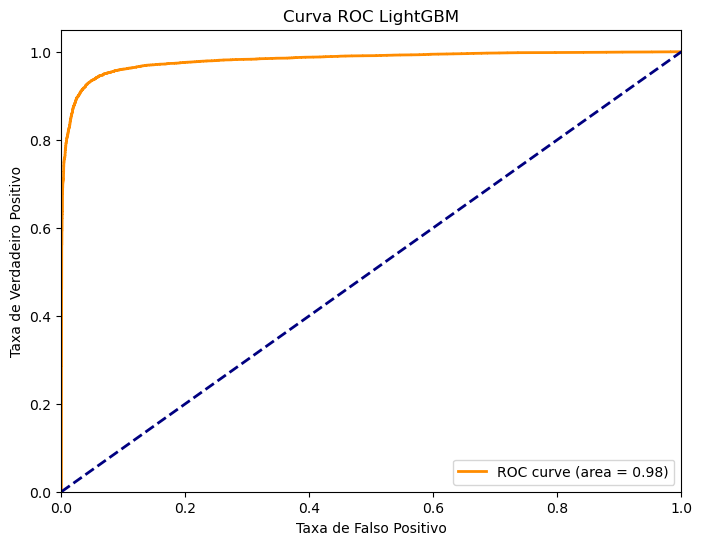

In [132]:
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50) 
best_params_lgbm = study_lgbm.best_params

pipeline_lgbm.set_params(**best_params_lgbm)
pipeline_lgbm.fit(X_train, y_train)

y_pred_lgbm = pipeline_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'Acurácia do modelo LightGBM: {accuracy_lgbm:.2f}')

y_prob_lgbm = pipeline_lgbm.predict_proba(X_test)[:, 1]
roc_auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print(f'ROC-AUC do modelo LightGBM: {roc_auc_lgbm:.2f}')

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print('Matriz de Confusão LightGBM:')
print(conf_matrix_lgbm)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lgbm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC LightGBM')
plt.legend(loc='lower right')
plt.show()

## EVALUATION

In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score

# Calcular acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Calcular AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_lg = roc_auc_score(y_test, y_prob_lg)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
roc_auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

# Calcular sensibilidade (recall)
recall_rf = recall_score(y_test, y_pred_rf)
recall_lg = recall_score(y_test, y_pred_lg)
recall_xgb = recall_score(y_test, y_pred_xgb)
recall_lgbm = recall_score(y_test, y_pred_lgbm)

# Calcular pontuação F1
f1_score_rf = f1_score(y_test, y_pred_rf)
f1_score_lg = f1_score(y_test, y_pred_lg)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)

In [134]:
metrics_dict = {
    'Modelo': ['Random Forest', 'Logistic Regression', 'XGBoost', 'LightGBM'],
    'Acurácia': [accuracy_rf, accuracy_lg, accuracy_xgb, accuracy_lgbm],
    'AUC': [roc_auc_rf, roc_auc_lg, roc_auc_xgb, roc_auc_lgbm],
    'Sensibilidade': [recall_rf, recall_lg, recall_xgb, recall_lgbm],
    'F1 Score': [f1_score_rf, f1_score_lg, f1_score_xgb, f1_score_lgbm]
}

df_metrics = pd.DataFrame(metrics_dict)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

styled_df = df_metrics.style.apply(highlight_max, subset=['Acurácia', 'AUC', 'Sensibilidade', 'F1 Score'], axis=0)
styled_df

,Modelo,Acurácia,AUC,Sensibilidade,F1 Score
0,Random Forest,0.909820,0.944665,0.935303,0.921162
1,Logistic Regression,0.923034,0.957326,0.908470,0.930058
2,XGBoost,0.942136,0.981524,0.936703,0.948017
3,LightGBM,0.941487,0.981458,0.938349,0.947552


Como o modelo não possui um grande desbalanceamento das classes, podemos utilizar a **AUC** como uma boa métrica.
Avaliando o desempenho nas métricas escolhidas para avaliação, consideramos como melhor modelo o **XGBoost**.